# DATA PREPROCESSING

In [1]:
#importing the necessary libraries
import pandas as pd

In [2]:
#reading the data 'importing it'
ccd = pd.read_csv('creditcard.csv')

In [3]:
#showing the first five lines of the table
ccd.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#informations about the dataset
ccd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
#check if there's a missing value
ccd.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
#good there's no missing values which is good and its suitable for work 

In [1]:
#im gonna split the class column into normal and fraud classes to understand it more in the visualizations later 

In [19]:
fraud = ccd[ccd['Class']==1]

normal = ccd[ccd['Class']==0]

In [31]:
normal_sample = normal.sample(n=492)
new_data = pd.concat([normal_sample, fraud], axis=0)

In [36]:
#i created a new data which is a sample of the main data just to let the model work better and faster and to give better results

# VISUALIZATION

In [4]:
ccd['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

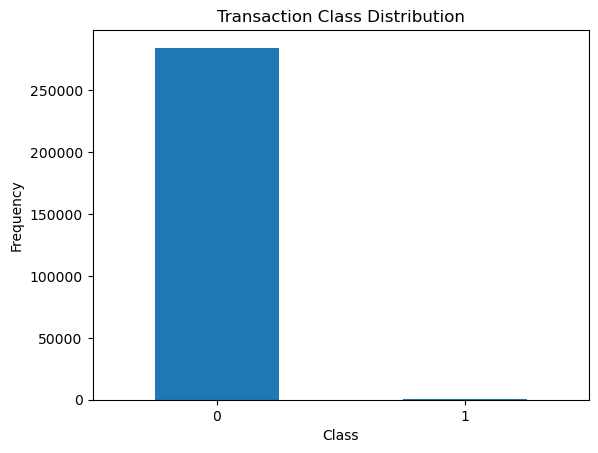

In [13]:
import matplotlib.pyplot as plt

classes = pd.value_counts(ccd['Class'], sort = True)

classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

obviously the bar plot is showing us that the normal class(0) is much higher than the fraud class (1)

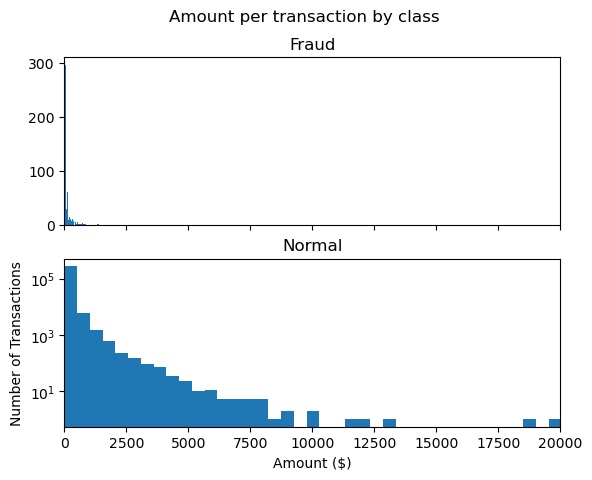

In [22]:
f, (hist1, hist2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
hist1.hist(fraud.Amount, bins = 50)
hist1.set_title('Fraud')
hist2.hist(normal.Amount, bins = 50)
hist2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

In [2]:
#here the two histograms showed that the normal transactions are much higher than the fraud ones

# MODEL BUILDING

In [32]:
new_data['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [34]:
x = new_data.drop(columns='Class',axis=1)
y = new_data['Class']

In [35]:
#i splitted the data into features and targets 
#which x are the features and y is the target

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=2)
#split the data into training and testing data

In [44]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
#creating a model based on LogisticRegression

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
from sklearn.metrics import accuracy_score
x_train_pred = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_pred, y_train)

In [47]:
x_test_pred = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_pred, y_test)

In [48]:
print('Accuracy on Training data : ', training_data_accuracy)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9504447268106735
Accuracy score on Test Data :  0.9390862944162437


In [3]:
#i did the model evaluation and calulated the accuracy on training and test data
#high accuracy is good so this model can identify fraudulent activity before it occurs